# What is a Confusion Matrix?
The million-dollar question – what, after all, is a confusion matrix?

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:

Confusion matrix
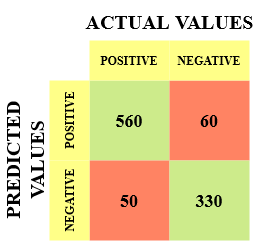
Let’s decipher the matrix:

The target variable has two values: Positive or Negative
The columns represent the actual values of the target variable
The rows represent the predicted values of the target variable
But wait – what’s TP, FP, FN and TN here? That’s the crucial part of a confusion matrix. Let’s understand each term below.

# Understanding True Positive, True Negative, False Positive and False Negative in a Confusion Matrix

#True Positive (TP) 

The predicted value matches the actual value
The actual value was positive and the model predicted a positive value

#True Negative (TN) 

The predicted value matches the actual value
The actual value was negative and the model predicted a negative value

#False Positive (FP) – Type 1 error

The predicted value was falsely predicted
The actual value was negative but the model predicted a positive value
Also known as the Type 1 error



#False Negative (FN) – Type 2 error

The predicted value was falsely predicted
The actual value was positive but the model predicted a negative value
Also known as the Type 2 error


# Precision And Recall
Precision tells us how many of the correctly predicted cases actually turned out to be positive.

Here’s how to calculate Precision:
    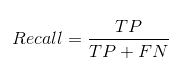
    
   

Confusion Matrix Precision
This would determine whether our model is reliable or not.

Recall tells us how many of the actual positive cases we were able to predict correctly with our model.

And here’s how we can calculate Recall:



   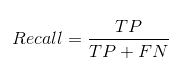
    
Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

Precision is important in music or video recommendation systems, e-commerce websites, etc. Wrong results could lead to customer churn and be harmful to the business.

Recall is a useful metric in cases where False Negative trumps False Positive.

Recall is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!


# F1-Score
In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value:

Confusion Matrix F1-score

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.



In [3]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
 df=pd.read_csv('C:/Users/deshm/Desktop/dataml/diabetes.csv')
 df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df.shape

(768, 9)

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

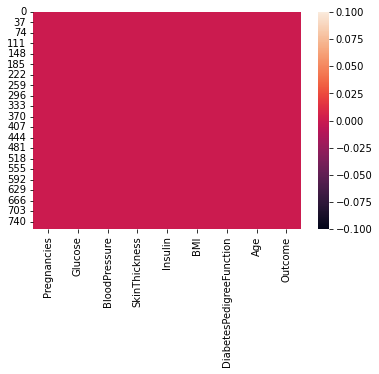

In [14]:
sns.heatmap(df.isnull())

c:\users\deshm\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

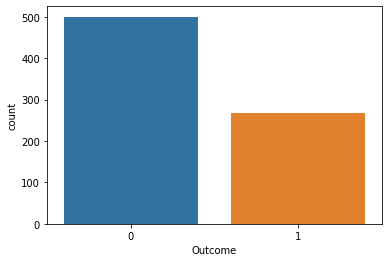

In [15]:
sns.countplot(df['Outcome'])

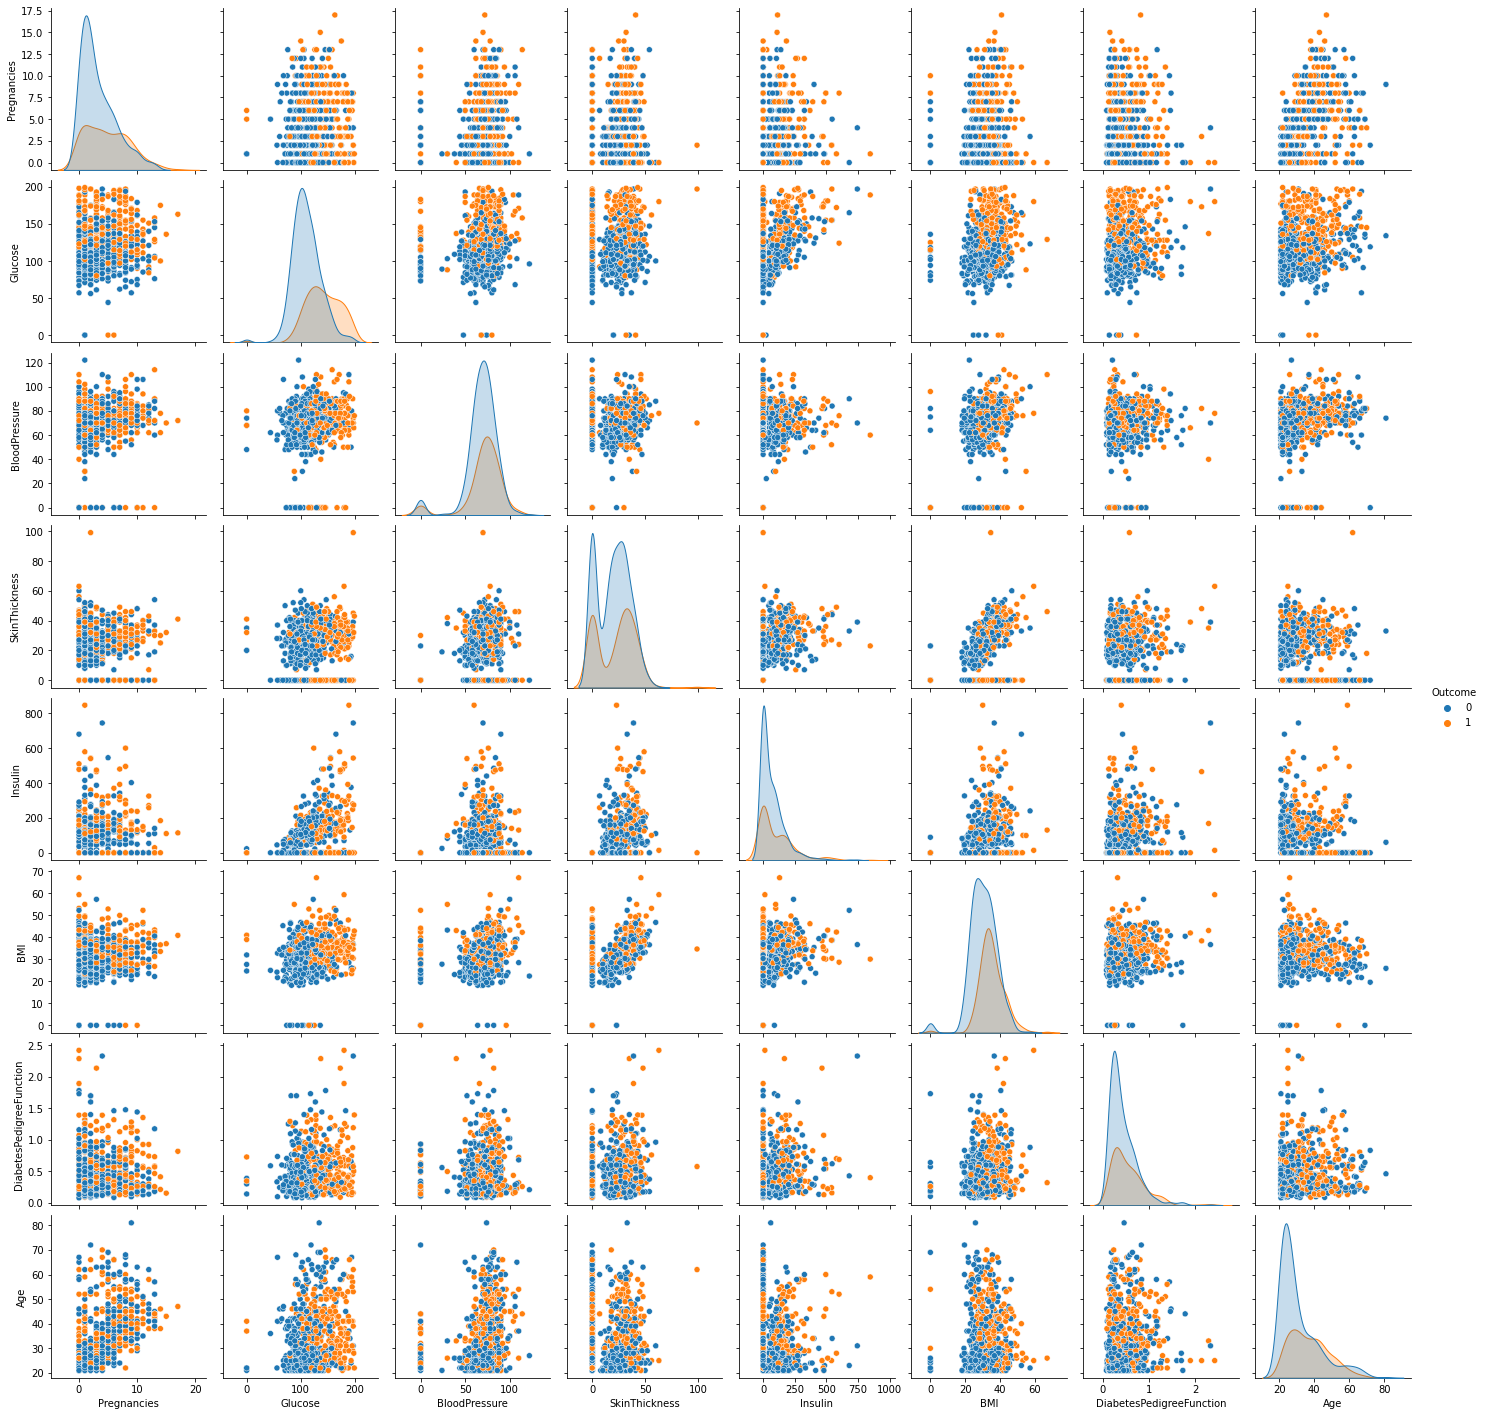

In [16]:
sns.pairplot(df,hue='Outcome')

In [19]:
X =df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [21]:
 from sklearn.linear_model import LogisticRegression
 log = LogisticRegression(random_state=0)
 log.fit(X,Y)

c:\users\deshm\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [26]:
q=log.predict(X_test)
q

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
Y_test

432    0
719    1
344    0
336    0
171    1
      ..
367    0
762    0
763    0
326    1
104    0
Name: Outcome, Length: 192, dtype: int64

c:\users\deshm\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\deshm\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


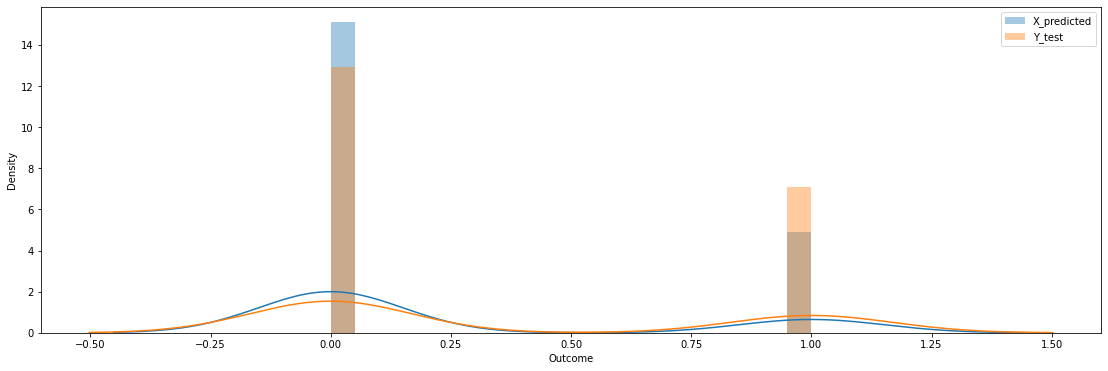

In [31]:
plt.figure(figsize=(19,6))
sns.distplot(q,bins=20,label="X_predicted")
sns.distplot(Y_test,bins=20,label="Y_test")
plt.legend()

In [33]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(Y_test,log.predict(X_test))

array([[110,  14],
       [ 35,  33]], dtype=int64)

# Precision and Recall

In [43]:
from sklearn.metrics import precision_score,recall_score


In [46]:
 precision_score(Y_test,log.predict(X_test))

0.7021276595744681

In [45]:
recall_score(Y_test,log.predict(X_test))

0.4852941176470588

# F-Score

In [49]:
from sklearn.metrics import f1_score
f1_score(Y_test,log.predict(X_test))

0.5739130434782609